In [3]:
import pandas as pd
from sodapy import Socrata
import numpy as np


In [4]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("healthdata.gov", None)
resultados = client.get("g62h-syeh", limit=48000)

# Convertir resultados en un dataframe
resultados_df = pd.DataFrame.from_records(resultados)






In [6]:
resultados_df.sort_values(by='date', ascending=True)

,state,date,critical_staffing_shortage_today_yes,critical_staffing_shortage_today_no,critical_staffing_shortage_today_not_reported,critical_staffing_shortage_anticipated_within_week_yes,critical_staffing_shortage_anticipated_within_week_no,critical_staffing_shortage_anticipated_within_week_not_reported,hospital_onset_covid,hospital_onset_covid_coverage,...,staffed_pediatric_icu_bed_occupancy_coverage,total_staffed_pediatric_icu_beds,total_staffed_pediatric_icu_beds_coverage,staffed_icu_pediatric_patients_confirmed_covid,on_hand_supply_therapeutic_c_bamlanivimab_etesevimab_courses,previous_week_therapeutic_c_bamlanivimab_etesevimab_courses_used,previous_day_admission_pediatric_covid_confirmed_0_4,previous_day_admission_pediatric_covid_confirmed_unknown,previous_day_admission_pediatric_covid_confirmed_12_17,previous_day_admission_pediatric_covid_confirmed_5_11
4501,MT,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17352,TX,2020-01-01T00:00:00.000,0,0,3,0,0,3,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14043,PR,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16481,HI,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13718,IN,2020-01-01T00:00:00.000,0,0,1,0,0,1,0,1,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39839,NM,2022-08-10T00:00:00.000,3,8,36,21,25,1,9,46,...,46,49,46,2,77,0,0,0,3,0
41749,AK,2022-08-10T00:00:00.000,1,18,2,2,17,2,2,21,...,21,5,21,0,602,0,1,0,0,0
45545,OH,2022-08-10T00:00:00.000,2,64,132,6,75,117,27,193,...,195,502,195,14,1701,0,13,0,3,2
34079,NV,2022-08-10T00:00:00.000,2,9,38,1,13,35,61,49,...,48,147,48,27,10,0,0,0,0,1


In [7]:
resultados_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47909 entries, 0 to 47908
Columns: 134 entries, state to previous_day_admission_pediatric_covid_confirmed_5_11
dtypes: object(134)
memory usage: 49.0+ MB


# # 1 - ¿Cuáles fueron los 5 Estados con mayor ocupación hospitalaria por COVID? Criterio de ocupación por cama común. Considere la cantidad de camas ocupadas con pacientes confirmados y tome como referencia los 6 primeros meses del 2020 - recuerde incluir la cifra de infectados en esos meses (acumulativo). ¿Influye el rango etario en este comportamiento?

In [8]:
resultados_df.drop(resultados_df.filter(regex= 'coverage|numerator|denominator|suspected|reported').columns, axis= 1, inplace= True)

In [10]:
import re

In [12]:
respuesta_1= resultados_df[['state','date','inpatient_beds_used_covid', 'total_adult_patients_hospitalized_confirmed_covid','total_pediatric_patients_hospitalized_confirmed_covid']]

In [13]:
import datetime as dt

In [14]:
respuesta_1["date"]= pd.to_datetime(respuesta_1['date'])
respuesta_1["Month"]= respuesta_1['date'].dt.month 

C:\Users\User\AppData\Local\Temp\ipykernel_10596\3819286870.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta_1["date"]= pd.to_datetime(respuesta_1['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_10596\3819286870.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta_1["Month"]= respuesta_1['date'].dt.month


In [15]:
# Filtro info entre dos fechas 

respuesta1= respuesta_1.loc[(respuesta_1['date']>= '2020-01-01')&(respuesta_1['date']<='2020-06-30')]                     

In [16]:
respuesta1.dropna()

,state,date,inpatient_beds_used_covid,total_adult_patients_hospitalized_confirmed_covid,total_pediatric_patients_hospitalized_confirmed_covid,Month
960,NY,2020-06-08,3363,3,0,6
1716,NY,2020-06-28,1477,0,0,6
1739,RI,2020-06-07,196,0,0,6
1830,NY,2020-06-13,2530,0,0,6
2032,NY,2020-06-22,1942,2,0,6
...,...,...,...,...,...,...
21496,PR,2020-04-14,300,149,6,4
21509,PR,2020-04-11,295,149,6,4
21526,NY,2020-04-28,10736,0,0,4
21541,RI,2020-04-10,251,0,0,4


In [17]:

respuesta1['inpatient_beds_used_covid'] = respuesta1['inpatient_beds_used_covid'].astype(float, errors= 'raise')
respuesta1['total_adult_patients_hospitalized_confirmed_covid'] = respuesta1['total_adult_patients_hospitalized_confirmed_covid'].astype(float, errors= 'raise')
respuesta1['total_pediatric_patients_hospitalized_confirmed_covid'] = respuesta1['total_pediatric_patients_hospitalized_confirmed_covid'].astype(float, errors= 'raise')

C:\Users\User\AppData\Local\Temp\ipykernel_10596\1960785220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta1['inpatient_beds_used_covid'] = respuesta1['inpatient_beds_used_covid'].astype(float, errors= 'raise')
C:\Users\User\AppData\Local\Temp\ipykernel_10596\1960785220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta1['total_adult_patients_hospitalized_confirmed_covid'] = respuesta1['total_adult_patients_hospitalized_confirmed_covid'].astype(float, errors= 'raise')
C:\Users\User\

In [18]:
respuesta1['total_adult_patients_hospitalized_confirmed_covid'] = respuesta1['total_adult_patients_hospitalized_confirmed_covid'].fillna(0)
respuesta1['total_pediatric_patients_hospitalized_confirmed_covid'] = respuesta1['total_pediatric_patients_hospitalized_confirmed_covid'].fillna(0)

C:\Users\User\AppData\Local\Temp\ipykernel_10596\334866634.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta1['total_adult_patients_hospitalized_confirmed_covid'] = respuesta1['total_adult_patients_hospitalized_confirmed_covid'].fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_10596\334866634.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta1['total_pediatric_patients_hospitalized_confirmed_covid'] = respuesta1['total_pediatric_patients_hospitalized_confirmed_covid'].fillna(0)


In [19]:
respuesta1['total_beds']= respuesta1['total_pediatric_patients_hospitalized_confirmed_covid']+respuesta1['total_adult_patients_hospitalized_confirmed_covid']

C:\Users\User\AppData\Local\Temp\ipykernel_10596\3363081517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta1['total_beds']= respuesta1['total_pediatric_patients_hospitalized_confirmed_covid']+respuesta1['total_adult_patients_hospitalized_confirmed_covid']


In [20]:
MaxEstado= respuesta1.groupby("state")['total_beds'].sum()

In [21]:
MaxEstado=(MaxEstado.to_frame())

In [22]:
MaxEstado.sort_values(by='total_beds',ascending=False).head(5)

,total_beds
state,
LA,40452.0
CA,36134.0
NV,20134.0
AZ,5177.0
IA,3174.0


# #  2 - Analice la ocupación de camas (Común) por COVID en el Estado de Nueva York durante la cuarentena establecida e indique:
# Intervalos de crecimiento y decrecimiento
# Puntos críticos (mínimos y máximos)

In [27]:
respuesta_2= respuesta1.loc[(respuesta1['state']== 'NY')]

In [28]:
respuesta_2= respuesta_2.loc[(respuesta_2['date']>= '2020-03-22')&(respuesta_2['date']<='2020-06-13')] 

In [29]:
import matplotlib.pyplot as plt

In [32]:
media = respuesta_2["inpatient_beds_used_covid"].mean() #promedio
mediana = respuesta_2["inpatient_beds_used_covid"].median() #valor que deja por debajo 50%


In [33]:
rango = respuesta_2["inpatient_beds_used_covid"].max() - respuesta_2["inpatient_beds_used_covid"].min()
iqr = respuesta_2["inpatient_beds_used_covid"].quantile(0.75) - respuesta_2["inpatient_beds_used_covid"].quantile(0.25)


In [34]:
print(media,mediana,rango,iqr)

7619.75 7524.5 13802.0 8268.0


In [35]:
respuesta_2.quantile(0.25)

inpatient_beds_used_covid                                4024.25
total_adult_patients_hospitalized_confirmed_covid           0.00
total_pediatric_patients_hospitalized_confirmed_covid       0.00
Month                                                       4.00
total_beds                                                  0.00
Name: 0.25, dtype: float64

In [36]:
respuesta_2.quantile(0.75)

inpatient_beds_used_covid                                12292.25
total_adult_patients_hospitalized_confirmed_covid            2.00
total_pediatric_patients_hospitalized_confirmed_covid        0.00
Month                                                        5.00
total_beds                                                   2.00
Name: 0.75, dtype: float64

In [38]:
respuesta_2.max()

state                                                                     NY
date                                                     2020-06-13 00:00:00
inpatient_beds_used_covid                                            14126.0
total_adult_patients_hospitalized_confirmed_covid                        5.0
total_pediatric_patients_hospitalized_confirmed_covid                    0.0
Month                                                                      6
total_beds                                                               5.0
dtype: object

In [39]:
respuesta_2.min()

state                                                                     NY
date                                                     2020-03-22 00:00:00
inpatient_beds_used_covid                                              324.0
total_adult_patients_hospitalized_confirmed_covid                        0.0
total_pediatric_patients_hospitalized_confirmed_covid                    0.0
Month                                                                      3
total_beds                                                               0.0
dtype: object

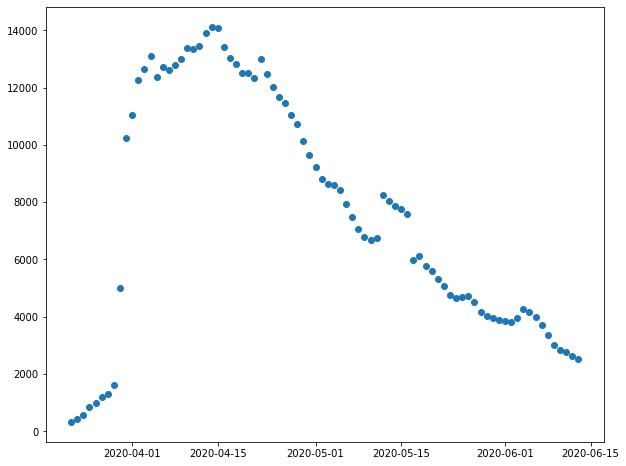

In [40]:
plt.figure(figsize = (10,8))
x1=respuesta_2['date']
y1=respuesta_2['inpatient_beds_used_covid']
plt.scatter(x1, y1)

# # 3 - ¿Cuáles fueron los cinco Estados que más camas UCI -Unidades de Cuidados Intensivos- utilizaron durante el año 2020? La medición debe realizarse en términos absolutos.

In [42]:
respuesta_3= resultados_df[['state','date','staffed_icu_adult_patients_confirmed_covid', 'staffed_icu_pediatric_patients_confirmed_covid']]
respuesta_3= respuesta_3.loc[(respuesta_3['date']>= '2020-01-01')&(respuesta_3['date']<='2020-12-31')] 

In [43]:

respuesta_3['staffed_icu_adult_patients_confirmed_covid'] = respuesta_3['staffed_icu_adult_patients_confirmed_covid'].astype(float, errors= 'raise')
respuesta_3['staffed_icu_pediatric_patients_confirmed_covid'] = respuesta_3['staffed_icu_pediatric_patients_confirmed_covid'].astype(float, errors= 'raise')

In [44]:
respuesta_3['staffed_icu_adult_patients_confirmed_covid'] = respuesta_3['staffed_icu_adult_patients_confirmed_covid'].fillna(0)
respuesta_3['staffed_icu_pediatric_patients_confirmed_covid'] = respuesta_3['staffed_icu_pediatric_patients_confirmed_covid'].fillna(0)

In [45]:
respuesta_3.dropna()

,state,date,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid
0,ID,2020-12-22T00:00:00.000,97.0,0.0
1,VT,2020-10-16T00:00:00.000,0.0,0.0
2,AR,2020-10-14T00:00:00.000,217.0,0.0
3,VI,2020-10-13T00:00:00.000,1.0,0.0
4,VI,2020-10-12T00:00:00.000,1.0,0.0
...,...,...,...,...
46220,NY,2020-12-30T00:00:00.000,1300.0,0.0
46227,RI,2020-12-29T00:00:00.000,62.0,0.0
46273,NH,2020-12-29T00:00:00.000,55.0,0.0
46326,CA,2020-12-29T00:00:00.000,4456.0,0.0


In [46]:
respuesta_3['Total_icu']= respuesta_3['staffed_icu_pediatric_patients_confirmed_covid']+respuesta_3['staffed_icu_adult_patients_confirmed_covid']
respuesta_3


,state,date,staffed_icu_adult_patients_confirmed_covid,staffed_icu_pediatric_patients_confirmed_covid,Total_icu
0,ID,2020-12-22T00:00:00.000,97.0,0.0,97.0
1,VT,2020-10-16T00:00:00.000,0.0,0.0,0.0
2,AR,2020-10-14T00:00:00.000,217.0,0.0,217.0
3,VI,2020-10-13T00:00:00.000,1.0,0.0,1.0
4,VI,2020-10-12T00:00:00.000,1.0,0.0,1.0
...,...,...,...,...,...
46220,NY,2020-12-30T00:00:00.000,1300.0,0.0,1300.0
46227,RI,2020-12-29T00:00:00.000,62.0,0.0,62.0
46273,NH,2020-12-29T00:00:00.000,55.0,0.0,55.0
46326,CA,2020-12-29T00:00:00.000,4456.0,0.0,4456.0


In [47]:
Max_Estado= respuesta_3.groupby("state")['Total_icu'].sum()

In [48]:
Max_Estado=(Max_Estado.to_frame())

In [49]:
Max_Estado.sort_values(by='Total_icu',ascending=False).head(5)

,Total_icu
state,
TX,332934.0
CA,257250.0
FL,174835.0
GA,94935.0
OH,88631.0


# # 4 - ¿Qué cantidad de camas se utilizaron, por Estado, para pacientes pediátricos con COVID durante el 2020?

In [50]:
Max_Estado1=respuesta_3.groupby("state")['staffed_icu_pediatric_patients_confirmed_covid'].sum()

In [51]:
Max_Estado1=(Max_Estado1.to_frame())

In [52]:
Max_Estado1.sort_values(by='staffed_icu_pediatric_patients_confirmed_covid',ascending=False).head(40)

,staffed_icu_pediatric_patients_confirmed_covid
state,
CA,989.0
MO,953.0
WI,815.0
AZ,625.0
GA,518.0
IN,474.0
RI,451.0
IL,444.0
AR,406.0


# # 5 - ¿Qué porcentaje de camas UCI corresponden a casos confirmados de COVID-19? Agrupe por Estado.

In [53]:
respuesta5= resultados_df[['state','date','staffed_icu_adult_patients_confirmed_covid', 'staffed_icu_pediatric_patients_confirmed_covid','staffed_adult_icu_bed_occupancy','staffed_pediatric_icu_bed_occupancy']]

In [54]:
respuesta5= respuesta5.loc[(respuesta5['date']>= '2020-01-01')&(respuesta5['date']<='2020-12-31')] 

In [55]:

respuesta5['staffed_icu_adult_patients_confirmed_covid'] = respuesta5['staffed_icu_adult_patients_confirmed_covid'].astype(float, errors= 'raise')
respuesta5['staffed_icu_pediatric_patients_confirmed_covid'] = respuesta5['staffed_icu_pediatric_patients_confirmed_covid'].astype(float, errors= 'raise')
respuesta5['staffed_adult_icu_bed_occupancy'] = respuesta5['staffed_adult_icu_bed_occupancy'].astype(float, errors= 'raise')
respuesta5['staffed_pediatric_icu_bed_occupancy'] = respuesta5['staffed_pediatric_icu_bed_occupancy'].astype(float, errors= 'raise')

In [56]:
respuesta5['staffed_icu_adult_patients_confirmed_covid'] = respuesta5['staffed_icu_adult_patients_confirmed_covid'].fillna(0)
respuesta5['staffed_icu_pediatric_patients_confirmed_covid'] = respuesta5['staffed_icu_pediatric_patients_confirmed_covid'].fillna(0)
respuesta5['staffed_adult_icu_bed_occupancy'] = respuesta5['staffed_adult_icu_bed_occupancy'].fillna(0)
respuesta5['staffed_pediatric_icu_bed_occupancy'] = respuesta5['staffed_pediatric_icu_bed_occupancy'].fillna(0)

In [57]:
respuesta5['Total_icu_covid']= respuesta5['staffed_icu_pediatric_patients_confirmed_covid']+respuesta5['staffed_icu_adult_patients_confirmed_covid']

In [59]:
respuesta5['Total_icu']= respuesta5['staffed_adult_icu_bed_occupancy']+respuesta5['staffed_pediatric_icu_bed_occupancy']

In [60]:
PorcentajeCama= respuesta5.groupby("state")['Total_icu'].sum()

In [61]:
PorcentajeCama=(PorcentajeCama.to_frame())

In [62]:
PorcentajeCamaCovid= respuesta5.groupby("state")['Total_icu_covid'].sum()

In [63]:
PorcentajeCamaCovid= (PorcentajeCamaCovid.to_frame())

In [64]:
comparacion= pd.merge(PorcentajeCama,PorcentajeCamaCovid, on= 'state', how= 'left')

In [65]:
comparacion['Porcentaje_covid_icu']=round(((comparacion['Total_icu_covid']*100)/comparacion['Total_icu']),2)

In [66]:
respuesta_5= comparacion.groupby("state")['Porcentaje_covid_icu'].sum()

In [67]:
respuesta_5= (respuesta_5.to_frame())

In [68]:
respuesta_5.sort_values(by='Porcentaje_covid_icu',ascending=False).head(40)

,Porcentaje_covid_icu
state,
WY,36.89
NV,36.20
MS,34.98
SD,33.25
AL,32.79
TX,32.02
AZ,31.67
OK,30.48
NE,30.06


# # 6 - ¿Cuántas muertes por covid hubo, por Estado, durante el año 2021?

In [69]:
respuesta6= resultados_df[['state','date','deaths_covid']]

In [70]:
respuesta6['deaths_covid'] = respuesta6['deaths_covid'].fillna(0)

C:\Users\User\AppData\Local\Temp\ipykernel_10596\2100414399.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta6['deaths_covid'] = respuesta6['deaths_covid'].fillna(0)


In [71]:
respuesta6['deaths_covid'] = respuesta6['deaths_covid'].astype(float, errors= 'raise')

C:\Users\User\AppData\Local\Temp\ipykernel_10596\2880883174.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta6['deaths_covid'] = respuesta6['deaths_covid'].astype(float, errors= 'raise')


In [72]:
respuesta6= respuesta6.loc[(respuesta6['date']>= '2021-01-01')&(respuesta6['date']<='2021-12-31')]

In [73]:
respuesta6["date"]= pd.to_datetime(respuesta6['date'])
respuesta6["Month"]= respuesta6['date'].dt.month 

C:\Users\User\AppData\Local\Temp\ipykernel_10596\1009441884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta6["date"]= pd.to_datetime(respuesta6['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_10596\1009441884.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta6["Month"]= respuesta6['date'].dt.month


In [74]:
respuesta6.deaths_covid.sum()

315733.0

In [75]:
muertes_covid= respuesta6.groupby("state")['deaths_covid'].sum()

In [76]:
muertes_covid= (muertes_covid.to_frame())

In [77]:
muertes_covid.sort_values(by='deaths_covid',ascending=False).head(40)

,deaths_covid
state,
CA,35046.0
TX,32826.0
FL,25974.0
NY,17540.0
AZ,16083.0
PA,13278.0
GA,12315.0
OH,11933.0
NC,10895.0


# # 7 - ¿Qué relación presenta la falta de personal médico, con la cantidad de muertes por covid durante el año 2021?

In [107]:
respuesta7= resultados_df[['state','date','critical_staffing_shortage_today_yes','deaths_covid']]
respuesta7['critical_staffing_shortage_today_yes'] = respuesta7['critical_staffing_shortage_today_yes'].fillna(0)
respuesta7['critical_staffing_shortage_today_yes'] = respuesta7['critical_staffing_shortage_today_yes'].astype(float, errors= 'raise')
respuesta7['deaths_covid'] = respuesta7['deaths_covid'].fillna(0)
respuesta7['deaths_covid'] = respuesta7['deaths_covid'].astype(float, errors= 'raise')

C:\Users\User\AppData\Local\Temp\ipykernel_10596\2434834743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta7['critical_staffing_shortage_today_yes'] = respuesta7['critical_staffing_shortage_today_yes'].fillna(0)
C:\Users\User\AppData\Local\Temp\ipykernel_10596\2434834743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta7['critical_staffing_shortage_today_yes'] = respuesta7['critical_staffing_shortage_today_yes'].astype(float, errors= 'raise')
C:\Users\User\AppData\Local\Temp\ipyker

In [108]:
respuesta7= respuesta7.loc[(respuesta7['date']>= '2021-01-01')&(respuesta7['date']<='2021-12-31')]

In [109]:
respuesta7["date"]= pd.to_datetime(respuesta7['date'])
respuesta7["Month"]= respuesta7['date'].dt.month 

C:\Users\User\AppData\Local\Temp\ipykernel_10596\2044084193.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta7["date"]= pd.to_datetime(respuesta7['date'])
C:\Users\User\AppData\Local\Temp\ipykernel_10596\2044084193.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respuesta7["Month"]= respuesta7['date'].dt.month


In [110]:
faltapersonal= respuesta7.groupby("date")['critical_staffing_shortage_today_yes'].sum()

In [111]:
faltapersonal= (faltapersonal.to_frame())

In [112]:
faltapersonal['totalmuertes']=respuesta6.groupby("date")['deaths_covid'].sum()

In [113]:
respuesta7=respuesta7.sort_values(by='date', ascending=True )

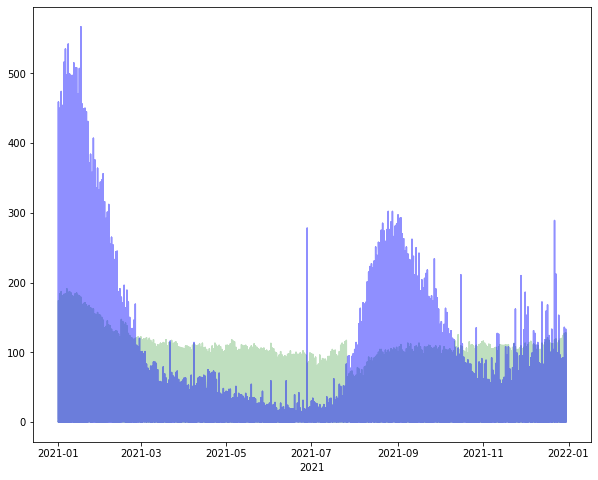

In [86]:

plt.figure(figsize = (10,8))
x=respuesta7['date']
y=respuesta7['critical_staffing_shortage_today_yes']
y1=respuesta7['deaths_covid']
plt.xlabel('2021')
plt.plot(x, y, color= 'green', alpha= 0.25)
plt.plot(x,y1, color= 'blue', alpha= 0.25)



In [87]:

from scipy import stats
from scipy.stats import pearsonr

In [115]:
a= respuesta7['critical_staffing_shortage_today_yes']
b= respuesta7['deaths_covid']

In [117]:
print('Correlación Pearson: ', respuesta7['critical_staffing_shortage_today_yes'].corr(respuesta7['deaths_covid'], method='pearson'))


Correlación Pearson:  0.5753600313089169


# # # se observa que cuando hubo picos de falta de personal(principios de 2021), las muertes fueron mayores, pero que ambas variables presentan un nivel de correlacion poco significativo

# # 8 - Siguiendo las respuestas anteriores, ¿cuál fue el peor mes de la pandemia para USA en su conjunto? Puede utilizar otras medidas que considere necesarias.

In [387]:
respuesta8= resultados_df[['state','date','staffed_icu_adult_patients_confirmed_covid', 'staffed_icu_pediatric_patients_confirmed_covid','total_adult_patients_hospitalized_confirmed_covid','deaths_covid','total_pediatric_patients_hospitalized_confirmed_covid']]
respuesta8= respuesta8.loc[(respuesta8['date']>= '2020-01-01')&(respuesta8['date']<='2021-12-31')] 
respuesta8['total_adult_patients_hospitalized_confirmed_covid'] = respuesta8['total_adult_patients_hospitalized_confirmed_covid'].fillna(0)
respuesta8['total_pediatric_patients_hospitalized_confirmed_covid'] = respuesta8['total_pediatric_patients_hospitalized_confirmed_covid'].fillna(0)
respuesta8['staffed_icu_adult_patients_confirmed_covid'] = respuesta8['staffed_icu_adult_patients_confirmed_covid'].fillna(0)
respuesta8['staffed_icu_pediatric_patients_confirmed_covid'] = respuesta8['staffed_icu_pediatric_patients_confirmed_covid'].fillna(0)
respuesta8['staffed_icu_adult_patients_confirmed_covid'] = respuesta8['staffed_icu_adult_patients_confirmed_covid'].astype(float, errors= 'raise')
respuesta8['staffed_icu_pediatric_patients_confirmed_covid'] = respuesta8['staffed_icu_pediatric_patients_confirmed_covid'].astype(float, errors= 'raise')
respuesta8['total_adult_patients_hospitalized_confirmed_covid'] = respuesta8['total_adult_patients_hospitalized_confirmed_covid'].astype(float, errors= 'raise')
respuesta8['total_pediatric_patients_hospitalized_confirmed_covid'] = respuesta8['total_pediatric_patients_hospitalized_confirmed_covid'].astype(float, errors= 'raise')
respuesta8['deaths_covid'] = respuesta8['deaths_covid'].fillna(0)
respuesta8['deaths_covid'] = respuesta8['deaths_covid'].astype(float, errors= 'raise')

respuesta8['Total_icu_covid']= respuesta8['staffed_icu_pediatric_patients_confirmed_covid']+respuesta8['staffed_icu_adult_patients_confirmed_covid']
respuesta8['Total_hospitalized_covid']= respuesta8['total_adult_patients_hospitalized_confirmed_covid']+respuesta8['total_pediatric_patients_hospitalized_confirmed_covid']

In [388]:
respuesta8["date"]= pd.to_datetime(respuesta8['date'])
respuesta8["Month"]= respuesta8['date'].dt.month
respuesta8= respuesta8.sort_values(by='date', ascending= True)

In [389]:
respuesta_8= respuesta8.set_index('date')

In [390]:
respuesta_8['Total_hospitalized_covid'].max()

29722.0

In [391]:
respuesta_8['Total_hospitalized_covid'].idxmax()

Timestamp('2021-01-14 00:00:00')

In [392]:
respuesta_8['Total_icu_covid'].max()


4926.0

In [393]:
respuesta_8['Total_icu_covid'].idxmax()

Timestamp('2021-01-11 00:00:00')

In [394]:
respuesta_8['deaths_covid'].max()

2251.0

In [395]:
respuesta_8['deaths_covid'].idxmax()

Timestamp('2020-05-28 00:00:00')

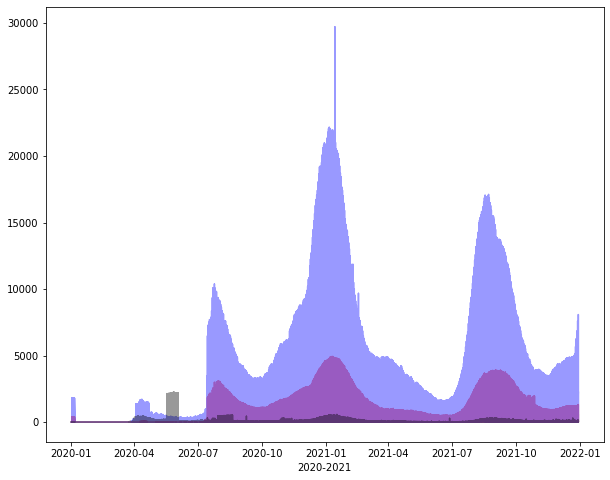

In [341]:

plt.figure(figsize = (10,8))
x_0=respuesta8['date']
y_0=respuesta8['Total_icu_covid']
y_1=respuesta8['Total_hospitalized_covid']
y_2=respuesta8['deaths_covid']
plt.xlabel('2020-2021')
plt.plot(x_0, y_0, color= 'red', alpha= 0.4)
plt.plot(x_0,y_1, color= 'blue', alpha= 0.4)
plt.plot(x_0,y_2, color= 'black', alpha= 0.4)


# # # se puede observar en base a este y otros graficos que a pesar que el pico de muertes por covid fue en mayo de 2020, el pico de contagios ocurrio en enero de 2021, asi como la ocupacion de camas de terapia. Por lo tanto si hablamos de vidas humanas considero que el peor mes es mayo 2020, pero si hablamos de capacidad hospitalizaria podemos decir que fue enero 2021, esto tambien se condice con lo observado durante la respuesta 7 donde vemos que le mes que mas faltante de personal hubo fue en Enero 2021

# # 9 - ¿Qué recomendaciones haría, ex post, con respecto a los recursos hospitalarios y su uso?

# # # se puede observar en el grafico anterior que las muertes dejan de tener picos bruscos a partir de diciembre 2020, lo cual conicide con el lanzamiento de la vacunacion a la poblacion(14/12/2020-https://www.france24.com/es/ee-uu-y-canad%C3%A1/20201214-covid19-inicia-vacunaci%C3%B3n-estados-unidos), pese a que en enero 2021 tuvo un pico de contagios, esto en proporcion a la cantidad de muertes ocurridas durante dicho periodo es muy bajo, se observa que durante los primeros de pandemia sin vacuna las muertes eran mayor en proporcion con los hospitalizados. Mi recomendacion en cuanto al uso hospitalario en base a esto y lo observado en el grafico de la pregunta 7(staff faltante) y el porcentaje obtenido en la pregunta 5, es que ante una crisis de esta magnitud alrededor de un 30% de las camas de terapia se utilizan solo para esta patologia o cualquier otra de similares caracteristas y que va a requerir de capacitar mayor cantidad de personal, ya que se observa que pese a que durante el pico hubo faltante esto es  una constante en casi todo el periodo abarcado, es decir los picos en personal faltante no son tan pronunciados. Es necesario realizar para tal fin capacitar todo el personal posible sea medico o no, ante una eventualidad de esta magnitud     